# **df5 - Preprocessing**

# **Customer Segmentation Dataset (Unsupervised Learning)**

In [ ]:
########################################################################

In [ ]:
import pandas as pd

In [ ]:
df5=pd.read_csv('/content/customer_clustering_ready_data.csv')

In [ ]:
df5.head()

Customer_ID  Age     Income        Location  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   58   40039.59        Johnberg   
1  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   61  153320.19  New Roberttown   
2  815ef6d1-3b8f-4a18-b7f8-a88b17fc695a   19   36865.14   New Jamesside   
3  96da1dac-72ff-4d2a-b86e-cbe06b65a6a4   63  136979.20        Lisatown   
4  b2b9437a-28df-4ec4-8e4a-2bbdc241330b   69  176474.06    Petersonberg   

   Number_of_Active_Policies  Total_Premium_Paid  Claim_Frequency  \
0                          3            12999.70                2   
1                          5             5260.00                6   
2                          2            25762.41                0   
3                          5            21556.47                7   
4                          2            35208.83                5   

   Policy_Upgrades  
0                0  
1                0  
2                1  
3                2  
4                2

In [ ]:
df5.head(1)

Customer_ID  Age    Income  Location  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   58  40039.59  Johnberg   

   Number_of_Active_Policies  Total_Premium_Paid  Claim_Frequency  \
0                          3             12999.7                2   

   Policy_Upgrades  
0                0

In [ ]:
#######################################################################################

# **1) Missing Values**

In [ ]:
df5.isnull().sum()

Customer_ID                  0
Age                          0
Income                       0
Location                     0
Number_of_Active_Policies    0
Total_Premium_Paid           0
Claim_Frequency              0
Policy_Upgrades              0
dtype: int64

# **No Missing Values Found**

# **If Missing Values have this Datasets.**

# **Step 1:**

check % of Missing Values if more than 70% Missing Values -> Delete that Columns

# **Step 2:**

Check this Columns have Normal Distribution and No Outliers - Use Mean Imputation

Else use Median Imputation

# **Step 3:**

Check that Columns Have Categorical Columns Use Mode

# **Step 4:**

If That Dataset have Times series Use Forward fill or Backward Fill

#**Step 5:**

If that Missing Values was Voluntarily Happen Based On Confidential else any other Situation

Client or SME or BA Give us Custom values fill us Cutom method to fill Missing Values

In [ ]:
########################################################################

# **2) Outliers**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

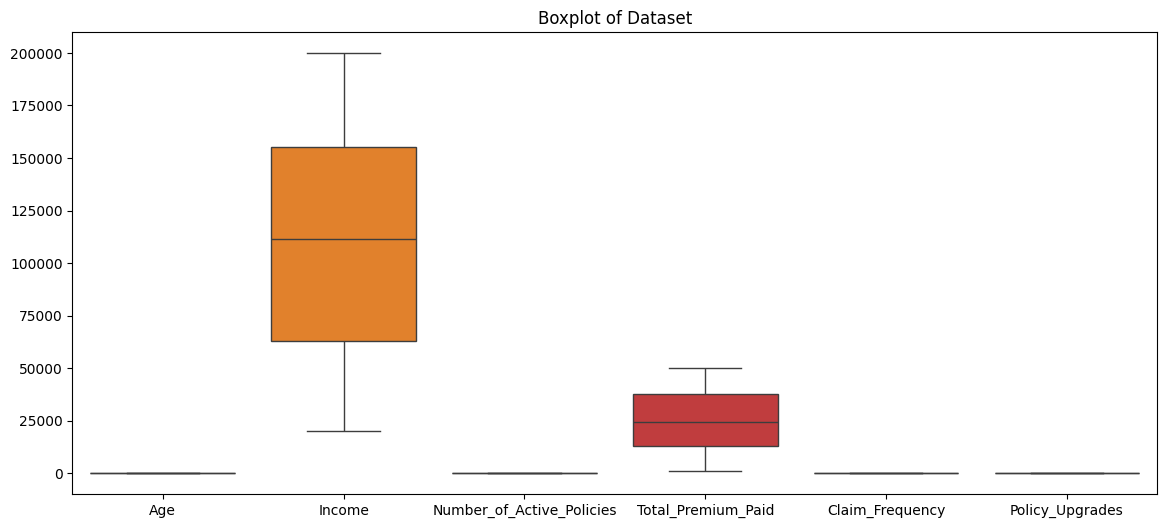

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=df5)
plt.title("Boxplot of Dataset")
plt.show()


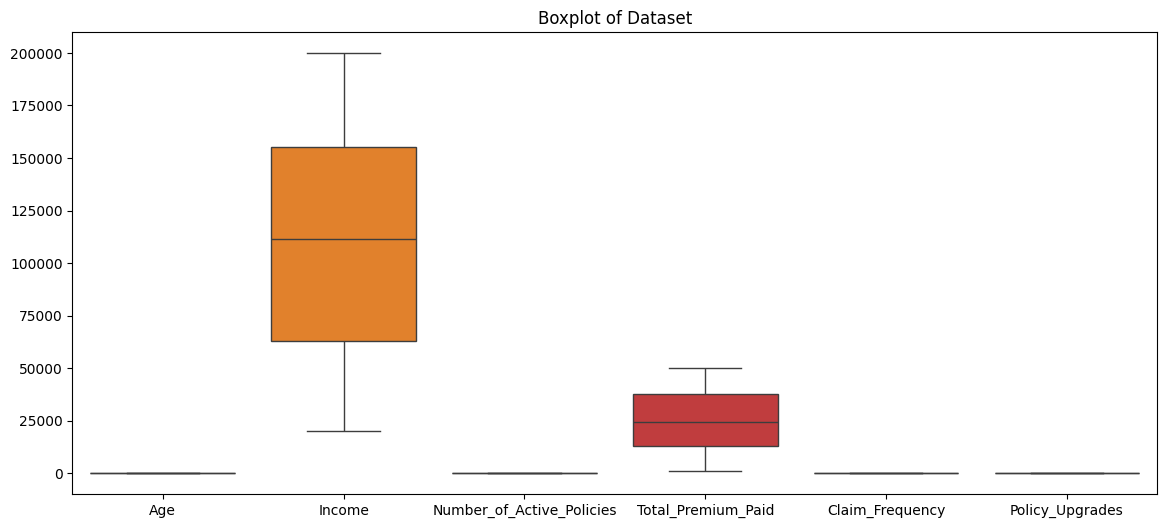

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=df5)
plt.title("Boxplot of Dataset")
plt.show()


In [ ]:
import pandas as pd

# Detect outliers using IQR for all numeric columns
outliers = {}

for col in df5.select_dtypes(include=['number']).columns:
    Q1 = df5[col].quantile(0.25)
    Q3 = df5[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df5[(df5[col] < lower_bound) | (df5[col] > upper_bound)][col].tolist()

# Print outliers for each column
for col, out in outliers.items():
    print(f"Outliers in {col}: {out}")


Outliers in Age: []
Outliers in Income: []
Outliers in Number_of_Active_Policies: []
Outliers in Total_Premium_Paid: []
Outliers in Claim_Frequency: []
Outliers in Policy_Upgrades: []


# **No Outlier Found in this Datasets**

# **If Outlier Found in this Datasets:-**

# **Step 1: Understand the Outliers**



**Check Data Entry Errors:** Typos or incorrect values? Fix them if possible.

**Assess Context:** Are these extreme values realistic or expected in your data domain?

#**Step 2: Choose an Outlier Treatment Approach:**



#**1) Removal Methods:**

**Delete Outliers:** If they’re definitely errors or irrelevant.

df_clean = df1[~((df1['A'] < lower_bound) | (df1['A'] > upper_bound))]


#**2) Imputation Methods:**

**Replace with Mean/Median:** Works well when outliers aren’t extreme.

median = df1['A'].median()
df1['A'] = np.where((df1['A'] < lower_bound) | (df1['A'] > upper_bound), median, df1['A'])

**Use Mode:** For categorical data with outliers


#**3) Transformation Methods:**

**Log Transformation:** Reduces effect of right-skewed outliers.

df1['A_log'] = np.log1p(df1['A'])

**Square Root or Box-Cox:** For data with different types of skew.


#**4) Capping or Clipping**

**Winsorization:** Limit extreme values to percentiles.

from scipy.stats.mstats import winsorize
df1['A_winsorized'] = winsorize(df1['A'], limits=[0.05, 0.05])  # Caps at 5th & 95th percentile

**Cap at Boundaries:** Replace outliers with IQR bounds.

df1['A'] = np.clip(df1['A'], lower_bound, upper_bound)


In [ ]:
########################################################################

# **3) Encoding**

# **No need Encoding. All Feature Columns has Numerical**

In [ ]:
########################################################################

# **3) Feature Scaling**

# **Apply StandardScaler for numerical variables.**

In [ ]:
df5.head()

Customer_ID  Age     Income        Location  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   58   40039.59        Johnberg   
1  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   61  153320.19  New Roberttown   
2  815ef6d1-3b8f-4a18-b7f8-a88b17fc695a   19   36865.14   New Jamesside   
3  96da1dac-72ff-4d2a-b86e-cbe06b65a6a4   63  136979.20        Lisatown   
4  b2b9437a-28df-4ec4-8e4a-2bbdc241330b   69  176474.06    Petersonberg   

   Number_of_Active_Policies  Total_Premium_Paid  Claim_Frequency  \
0                          3            12999.70                2   
1                          5             5260.00                6   
2                          2            25762.41                0   
3                          5            21556.47                7   
4                          2            35208.83                5   

   Policy_Upgrades  
0                0  
1                0  
2                1  
3                2  
4                2

So i took Numerical Columns from **[ Income & Total_Premium_Paid ]**

# **Reason:**

this columns have 4 digit values, 5 digit values and 6 digit values machine very tough to upderstand or high variance create so i scale this columns take as Means = 0 and take standard deviation as 1 : to scale the columns as standardization.

# **Z-Score method**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the columns to standardize
columns_to_scale = ['Income', 'Total_Premium_Paid']

# Apply the scaler and transform the columns
df5[columns_to_scale] = scaler.fit_transform(df5[columns_to_scale])

# Check the results
print(df5.head())

                            Customer_ID  Age    Income        Location  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   58 -1.347477        Johnberg   
1  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   61  0.835905  New Roberttown   
2  815ef6d1-3b8f-4a18-b7f8-a88b17fc695a   19 -1.408661   New Jamesside   
3  96da1dac-72ff-4d2a-b86e-cbe06b65a6a4   63  0.520947        Lisatown   
4  b2b9437a-28df-4ec4-8e4a-2bbdc241330b   69  1.282176    Petersonberg   

   Number_of_Active_Policies  Total_Premium_Paid  Claim_Frequency  \
0                          3           -0.861332                2   
1                          5           -1.408809                6   
2                          2            0.041455                0   
3                          5           -0.256058                7   
4                          2            0.709659                5   

   Policy_Upgrades  
0                0  
1                0  
2                1  
3                2  
4                2  


In [ ]:
df5.head()

Customer_ID  Age    Income        Location  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   58 -1.347477        Johnberg   
1  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   61  0.835905  New Roberttown   
2  815ef6d1-3b8f-4a18-b7f8-a88b17fc695a   19 -1.408661   New Jamesside   
3  96da1dac-72ff-4d2a-b86e-cbe06b65a6a4   63  0.520947        Lisatown   
4  b2b9437a-28df-4ec4-8e4a-2bbdc241330b   69  1.282176    Petersonberg   

   Number_of_Active_Policies  Total_Premium_Paid  Claim_Frequency  \
0                          3           -0.861332                2   
1                          5           -1.408809                6   
2                          2            0.041455                0   
3                          5           -0.256058                7   
4                          2            0.709659                5   

   Policy_Upgrades  
0                0  
1                0  
2                1  
3                2  
4                2

In [ ]:
df5.to_csv('df5_scaled.csv')